# Second version of data analysis

In [540]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [541]:
# file path
file_path = r"C:\Users\belan\bap_thesis\data\final_combined_data.csv"

# read data
data = pd.read_csv(file_path)

# check head 
print(data.head())



   Country  essround  edition          idno   dweight  pspwght   pweight  \
0  Austria       1.0      6.7   1977.049623  0.999998      1.0  0.271487   
1  Austria       2.0      3.6   2201.447695  1.000017      1.0  0.302006   
2  Austria       3.0      3.7   2738.014553  1.000005      1.0  0.289116   
3  Austria      10.0      3.1  33847.528210  1.000000      1.0  0.381786   
4  Austria       7.0      2.3   1771.375487  1.000000      1.0  0.406019   

   anweight      prob    stratum  ...   e_wb_pop  e_pechmor  e_miinteco  \
0  0.271488       NaN        NaN  ...  8081957.0       5.31         NaN   
1       NaN       NaN        NaN  ...  8171966.0       5.05         NaN   
2       NaN       NaN        NaN  ...  8268641.0       4.76         NaN   
3  0.381786  0.000839  59.987019  ...  8321496.0       4.54         NaN   
4  0.406019       NaN        NaN  ...  8546356.0       3.80         NaN   

   e_civil_war  e_miinterc  e_pt_coup  e_pt_coup_attempts  \
0          0.0         NaN     

# Data exploration

Descriptive statistics, distributions, correlation and multicollinearity , vif

In [542]:
# needed data:

# IV IV:  Foreign governments dissemination of false information (C) 
#   (v2smfordom)

# DV DV:  trust in government ( overall_trust_national )

# control variables:
#   - Government social media censorship in practice (v2smgovsmcenprc)
#   - perceptions of corruption (v2x_corr) 
#   - Economic satisfaction (stfeco) 
#   - electoral democracy index (v2x_polyarchy)
#   -  Government dissemination of false information domestic (v2smgovdom)
#   -  Education 15+ (e_peaveduc)

# interaction variables:
# Hypothesis 1: polarization - Polarization of society (C) (v2smpolsoc)
# Hypothesis 2: level of internet penetration, percentage of population who has internet access ( Level of Internet Penetration )

# model:
# multilevel model with 
# level 1: country level
# level 2: regional level (west vs east europe)
# level 3: year level





In [543]:
# check how the needed data looks
print(data[['v2smfordom', 'overall_trust_national', 'v2smgovsmcenprc', 
            'v2x_corr', 'stfeco', 'v2x_polyarchy', 'v2smgovdom', 
            'e_peaveduc', 'v2smpolsoc', 'Level_of_Internet_Penetration']].head())

   v2smfordom  overall_trust_national  v2smgovsmcenprc  v2x_corr    stfeco  \
0       0.232                7.045968             2.14     0.098  8.369960   
1       0.232                6.970035             2.14     0.103  8.247340   
2       0.232                7.579044             2.14     0.089  9.832848   
3       0.232                5.465502             2.14     0.072  6.814279   
4      -0.013                5.956992             2.14     0.051  6.355989   

   v2x_polyarchy  v2smgovdom  e_peaveduc  v2smpolsoc  \
0          0.860       1.542      11.292       0.789   
1          0.861       1.542      11.344       0.789   
2          0.865       1.542      11.396       0.789   
3          0.874       1.542      11.448       0.789   
4          0.873       1.702      11.500       0.589   

   Level_of_Internet_Penetration  
0                        36.5600  
1                        54.2800  
2                        63.6000  
3                        72.8700  
4                  

In [544]:
# check scale and measurement of variables
print(data[['v2smfordom', 'overall_trust_national', 'v2smgovsmcenprc', 
            'v2x_corr', 'stfeco', 'v2x_polyarchy', 'v2smgovdom', 
            'e_peaveduc', 'v2smpolsoc', 'Level_of_Internet_Penetration']].describe())


       v2smfordom  overall_trust_national  v2smgovsmcenprc    v2x_corr  \
count  234.000000              234.000000       234.000000  234.000000   
mean     0.951581                6.348752         1.747949    0.087983   
std      1.180356                1.240355         0.466954    0.107012   
min     -3.202000                3.390939         0.539000    0.002000   
25%      0.251000                5.584161         1.526000    0.017000   
50%      0.757000                6.160749         1.899500    0.044000   
75%      1.737750                6.929971         2.093000    0.119250   
max      3.122000               13.177030         2.380000    0.650000   

           stfeco  v2x_polyarchy  v2smgovdom  e_peaveduc  v2smpolsoc  \
count  234.000000     234.000000  234.000000  216.000000  234.000000   
mean     6.572543       0.862017    1.891073   11.283255    0.573372   
std      1.841096       0.057739    0.799355    1.292267    1.261106   
min      1.472192       0.588000   -1.324000 

Variabelen en Schalen

a) v2smfordom (IV: Foreign Government Dissemination of False Information)

Bereik: Negatief (-0.013) tot positief (0.232) in dit voorbeeld.
Dit lijkt een z-scoreschaal of een gestandaardiseerde schaal te zijn. Negatieve waarden duiden waarschijnlijk op een lagere mate van desinformatie, terwijl positieve waarden wijzen op een hogere mate van verspreiding.
Geschikt voor regressie als continu variabele.

b) overall_trust_national (DV: Trust in Government)

Bereik: 5.46 tot 7.58 in dit voorbeeld.
Dit is een gemiddelde van een schaal (waarschijnlijk 1-10) per land en jaar. Het gemiddelde ligt binnen de verwachte range en lijkt consistent.
Geschikt voor regressie als continu variabele.


c) v2smgovsmcenprc (Control: Social Media Censorship in Practice)

Bereik: 2.14 (constant in dit voorbeeld).
Deze waarde lijkt weinig variatie te hebben in de getoonde data. Controleer of deze variabele variatie vertoont tussen landen en jaren. Als de variabele constant is, biedt deze mogelijk geen extra verklarende kracht in het model.


d) v2x_corr (Control: Perceptions of Corruption)

Bereik: 0.051 tot 0.103 in dit voorbeeld.
Lijkt een index met waarden tussen 0 en 1, wat consistent is met de schaal van V-Dem. Geschikt als controlevariabele.


e) stfeco (Control: Economic Satisfaction)

Bereik: 6.35 tot 9.83 in dit voorbeeld.
Een schaal die variatie in economische tevredenheid weergeeft. Waarden passen binnen de context van gemiddelden per land en jaar. Geschikt voor regressie.


f) v2x_polyarchy (Control: Electoral Democracy Index)

Bereik: 0.860 tot 0.874 in dit voorbeeld.
Een index van democratie (0-1). Kleine variaties suggereren een hoge democratische kwaliteit in de meeste getoonde landen, maar er is voldoende variatie voor regressie.


g) v2smgovdom (Control: Government Dissemination of False Information - Domestic)

Bereik: 1.542 tot 1.702 in dit voorbeeld.
Dit lijkt een continu variabele te zijn die ook informatie over desinformatie bevat. Geschikt voor regressie.


h) e_peaveduc (Control: Education 15+)

Waarden rond 11.3 tot 11.5 in dit voorbeeld.
Dit is het gemiddelde aantal jaren onderwijs per land. Waarden zijn continu en geschikt voor regressie.


i) v2smpolsoc (Interaction: Polarization of Society)

Waarden rond 0.589 tot 0.789 in dit voorbeeld.
Deze variabele lijkt goed geschaald, met variatie die geschikt is voor regressie.

j) Level_of_Internet_Penetration (Interaction: Percentage with Internet Access)

Bereik: 36.56 tot 80.99 in dit voorbeeld.
Dit is een percentage, wat een continu variabele is. Geschikt voor regressie.

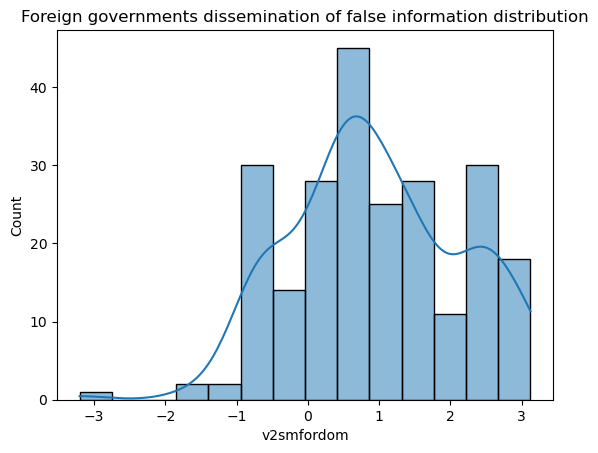

In [545]:
# distribution of the variables

# IV: Foreign governments dissemination of false information (C) (v2smfordom)
sns.histplot(data['v2smfordom'], kde=True)
plt.title('Foreign governments dissemination of false information distribution')
plt.show()

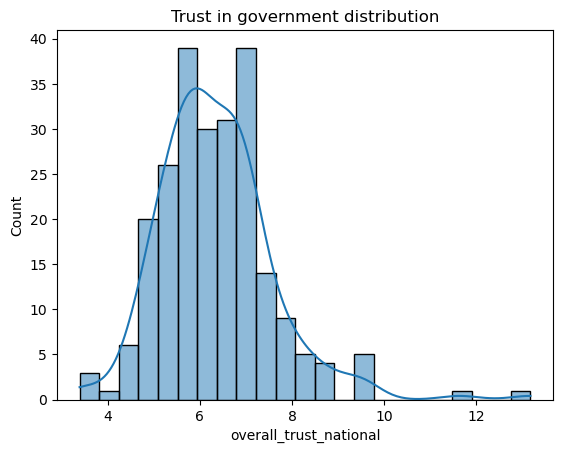

In [546]:
# distribution DV: trust in government ( overall_trust_national )
sns.histplot(data['overall_trust_national'], kde=True)
plt.title('Trust in government distribution')
plt.show()

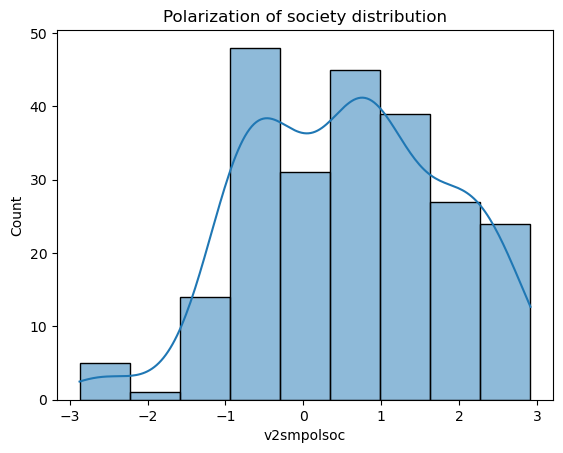

In [547]:
# distribution of interaction variables 
# polarization - Polarization of society (C) (v2smpolsoc)
sns.histplot(data['v2smpolsoc'], kde=True)
plt.title('Polarization of society distribution')
plt.show()

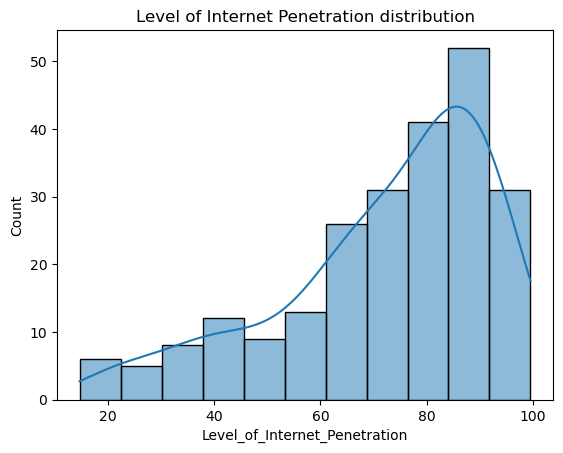

In [548]:
# level of internet penetration, percentage of population who has internet access ( Level of Internet Penetration )
sns.histplot(data['Level_of_Internet_Penetration'], kde=True)   
plt.title('Level of Internet Penetration distribution')
plt.show()

Check correlation and multicollinearity 

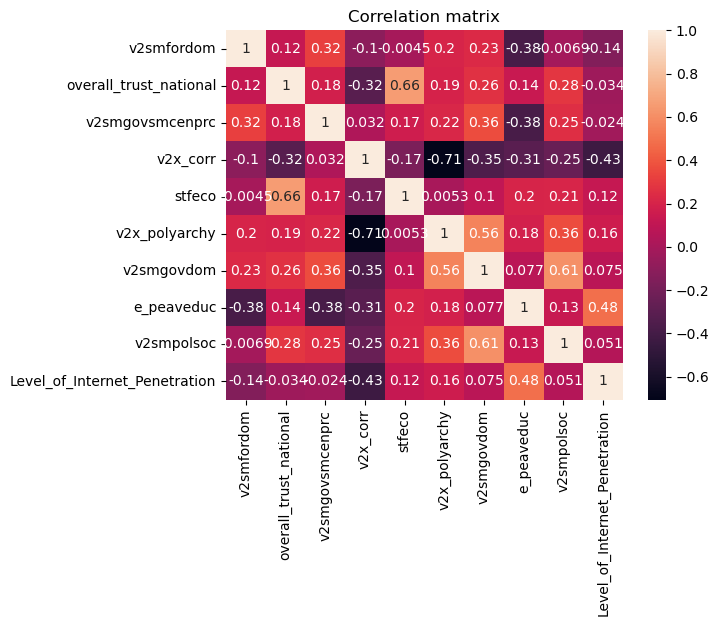

In [549]:
correlation_matrix = data[['v2smfordom', 'overall_trust_national', 'v2smgovsmcenprc',
                            'v2x_corr', 'stfeco', 'v2x_polyarchy', 'v2smgovdom',
                            'e_peaveduc', 'v2smpolsoc', 'Level_of_Internet_Penetration']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation matrix')
plt.show()

stfeco and overall_trust_national (0.66): A relatively strong correlation. This makes sense, because economic satisfaction is closely related to trust in government. This may affect the explanatory power of this variable in the model, so check VIF to assess multicollinearity.


v2x_corr and v2x_polyarchy (-0.71): This negative correlation shows that countries with a higher degree of democracy have less corruption perceptions. This could potentially lead to multicollinearity.


What do we see: 
- v2x_polyarchy and v2x_corr: Correlation = -0.71
These two variables are highly correlated, likely capturing overlapping concepts (e.g., democracy and corruption perception). Consider removing one of them.


- v2x_polyarchy and e_peaveduc: Correlation = 0.56
Strong, but less severe. May not need immediate action.


- stfeco and overall_trust_national: Correlation = 0.66
Economic satisfaction is naturally tied to trust in government, but the strong correlation could affect multicollinearity.

- v2smgovdom and v2smpolsoc: Correlation = 0.61

but all models are compliant with my theoretical framework



In [550]:
# check vif for multicollinearity to give a formal check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Selecteer de relevante variabelen
X = data[['v2smfordom', 'overall_trust_national', 'v2smgovsmcenprc', 'v2x_corr', 'stfeco', 
          'v2x_polyarchy', 'v2smgovdom', 'e_peaveduc', 
          'v2smpolsoc', 'Level_of_Internet_Penetration']]

# look at missing values
print(X.isnull().sum())



v2smfordom                        0
overall_trust_national            0
v2smgovsmcenprc                   0
v2x_corr                          0
stfeco                            0
v2x_polyarchy                     0
v2smgovdom                        0
e_peaveduc                       18
v2smpolsoc                        0
Level_of_Internet_Penetration     0
dtype: int64


In [551]:
# Step 1: Add 'Country' and 'Year' columns to X
X = X.copy()  # make an explicit copy of the DataFrame
X['Country'] = data['Country']
X['Year'] = data['Year']  # Ensure the 'Year' column is included

# Step 2: Impute based on both 'Country' and 'Year'
X['e_peaveduc'] = X.groupby(['Country', 'Year'])['e_peaveduc'].transform(lambda x: x.fillna(x.mean()))

# Step 3: Fallback to country-level mean
X['e_peaveduc'] = X.groupby('Country')['e_peaveduc'].transform(lambda x: x.fillna(x.mean()))

# Step 4: Fallback to year-level mean
X['e_peaveduc'] = X.groupby('Year')['e_peaveduc'].transform(lambda x: x.fillna(x.mean()))

# Step 5: Fallback to overall mean
X['e_peaveduc'] = X['e_peaveduc'].fillna(X['e_peaveduc'].mean())

# Step 6: Remove 'Country' and 'Year' columns after imputation
X = X.drop(columns=['Country', 'Year'])

# Step 7: Check if there are any missing values left
print("Missing values in 'e_peaveduc':", X['e_peaveduc'].isnull().sum())


Missing values in 'e_peaveduc': 0


In [552]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


                        Variable         VIF
0                     v2smfordom    2.273293
1         overall_trust_national   56.678432
2                v2smgovsmcenprc   27.671823
3                       v2x_corr    2.580742
4                         stfeco   27.650464
5                  v2x_polyarchy  176.901067
6                     v2smgovdom   14.078739
7                     e_peaveduc  168.429248
8                     v2smpolsoc    2.091509
9  Level_of_Internet_Penetration   24.866842


Problematic Variables:
- v2x_polyarchy (170.9) ( electoral democracy index )
- e_peaveduc (167.5) (Education 15+)
- v2smgovsmcenprc (27.7) ( Government social media censorship in practice )
- Level_of_Internet_Penetration (23.2)
- stfeco (16.3) (satisfaction with economy )

These high values suggest strong multicollinearity between variables, which can distort regression coefficients and make the model unstable.

In [553]:
# centre and scale the data to see if it improves the vif
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

vif_data_scaled = pd.DataFrame()
vif_data_scaled["Variable"] = X_scaled.columns

vif_data_scaled["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
print(vif_data_scaled)



                        Variable       VIF
0                     v2smfordom  1.378250
1         overall_trust_national  2.218688
2                v2smgovsmcenprc  1.845024
3                       v2x_corr  3.347685
4                         stfeco  2.011011
5                  v2x_polyarchy  3.187167
6                     v2smgovdom  2.247160
7                     e_peaveduc  2.054615
8                     v2smpolsoc  1.751419
9  Level_of_Internet_Penetration  1.910378


In [554]:
# also show sd and ci for trust in government
print(X_scaled['overall_trust_national'].std())
print(X_scaled['overall_trust_national'].sem())

1.0021436251823201
0.06551217820804182


In [555]:
# show scaled data for polarization
print(X_scaled['v2smpolsoc'].std())
print(X_scaled['v2smpolsoc'].sem())

# print minimum and maximum polarization
print(X_scaled['v2smpolsoc'].min())
print(X_scaled['v2smpolsoc'].max())
print(X_scaled['v2smpolsoc'].mean())


1.0021436251823204
0.06551217820804182
-2.7394696322992313
1.862374782696578
3.036507417778206e-17


Text(0.5, 1.0, 'Comparison of original and scaled data for polarization')

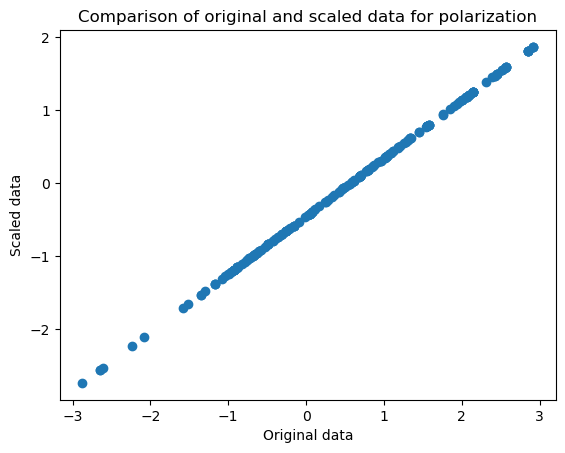

In [556]:
# compare the scaled data for polarization with the original data in a plot
# x axis is the original data, y axis is the scaled data
plt.scatter(data['v2smpolsoc'], X_scaled['v2smpolsoc'])
plt.xlabel('Original data')
plt.ylabel('Scaled data')
plt.title('Comparison of original and scaled data for polarization')


# Check variables for variation

In [557]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# select only the columns we need
numeric_data = numeric_data[['v2smfordom', 'overall_trust_national', 'v2smgovsmcenprc',
                             'v2x_corr', 'stfeco', 'v2x_polyarchy', 'v2smgovdom',
                             'e_peaveduc', 'v2smpolsoc', 'Level_of_Internet_Penetration']]

# Check variation per country
country_variation = numeric_data.groupby(data['Country']).std()
print(country_variation)

# Check variation per year
year_variation = numeric_data.groupby(data['Year']).std()
print(year_variation)


                v2smfordom  overall_trust_national  v2smgovsmcenprc  v2x_corr  \
Country                                                                         
Austria           0.241460                0.739304         0.000000  0.025975   
Belgium           0.693865                0.619197         0.197406  0.000000   
Bulgaria          0.606202                1.195052         0.213789  0.084404   
Croatia           0.318285                0.741683         0.223634  0.075117   
Cyprus            0.329420                1.497331         0.253541  0.023355   
Czechia           0.307363                0.742102         0.190000  0.019073   
Denmark           0.400576                0.424118         0.000000  0.000000   
Estonia           0.632710                1.465955         0.000000  0.004640   
Finland           0.269670                0.216861         0.000000  0.003239   
France            0.169890                0.489622         0.250992  0.004407   
Germany           0.292460  

Per Country:
- Variation for key variables like v2smfordom (Foreign governments dissemination of false information) and overall_trust_national (trust in government) is evident across countries.

exclude based on variation:
- v2smgovsmcenprc (Government social media censorship in practice)
    - Some countries show zero variation for this variable. If the variation is insufficient across years or countries, it might not add explanatory power to the model. Might add as a binary variable 
- v2x_polyarchy (Electoral democracy index):
    - This variable has a very high VIF (indicating multicollinearity) and small variation across countries and years in the dataset. Also not central to the hypothesis.
- e_peaveduc (Education 15+):
    - This variable has a very high VIF (>10) in the unscaled data, suggesting it may overlap significantly with other variables. It isn’t central to my hypothesis, it could be excluded to simplify the model.
- v2smgovdom (Government dissemination of false information – domestic): 
    -  primary interest is foreign governments’ disinformation, the inclusion of this variable could complicate the interpretation. I don't hypothesize interaction or additive effects with foreign disinformation so probably should ignore.

# Some fun plots to see all the data!

First start with a region plot :)

In [558]:
# Define the regions based geogrpahical location
region_mapping = {
    "Austria": "Western Europe",
    "Belgium": "Western Europe",
    "Bulgaria": "Eastern Europe",
    "Croatia": "Eastern Europe",
    "Cyprus": "Southern Europe",
    "Czechia": "Eastern Europe",
    "Denmark": "Northern Europe",
    "Estonia": "Northern Europe",
    "Finland": "Northern Europe",
    "France": "Western Europe",
    "Germany": "Western Europe",
    "Greece": "Southern Europe",
    "Iceland": "Northern Europe",
    "Ireland": "Northern Europe",
    "Italy": "Southern Europe",
    "Israel": "Southern Europe",  # Geographically part of the Middle East but sometimes grouped with Europe
    "Latvia": "Northern Europe",
    "Lithuania": "Northern Europe",
    "Luxembourg": "Western Europe",
    "Netherlands": "Western Europe",
    "Norway": "Northern Europe",
    "Poland": "Eastern Europe",
    "Portugal": "Southern Europe",
    "Romania": "Eastern Europe",
    "Slovakia": "Eastern Europe",
    "Slovenia": "Eastern Europe",
    "Spain": "Southern Europe",
    "Sweden": "Northern Europe",
    "Switzerland": "Western Europe",
    "United Kingdom": "Northern Europe",
}

# Create a function to map countries to regions
def map_country_to_region(country):
    return region_mapping.get(country, "Unknown")

# Example usage with your dataset
data['Region'] = data['Country'].apply(map_country_to_region)

# Display data with the added 'Region' column
print(data[['Country', 'Region']].head())


   Country          Region
0  Austria  Western Europe
1  Austria  Western Europe
2  Austria  Western Europe
3  Austria  Western Europe
4  Austria  Western Europe


Make a fun cluster plot!

C:\Users\belan\AppData\Local\Temp\ipykernel_50180\2868997003.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='overall_trust_national', data=data, ax=ax, palette='Set3')
C:\Users\belan\AppData\Local\Temp\ipykernel_50180\2868997003.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(


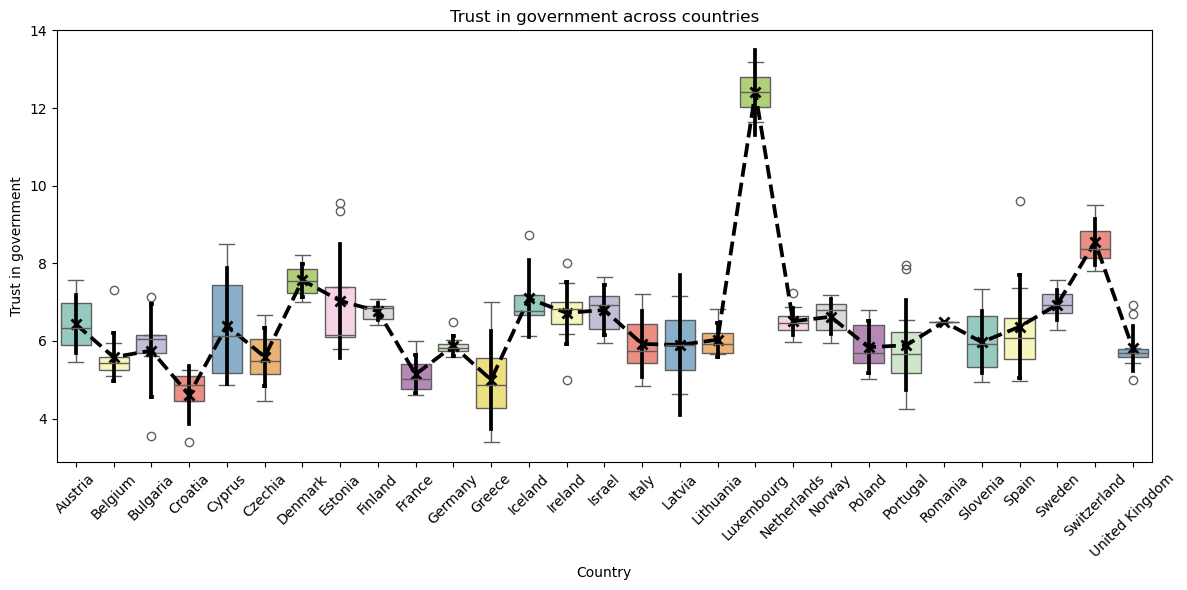

In [559]:
# distribution of trust score across regions with confidence intervals

# set up a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# create a boxplot
sns.boxplot(x='Country', y='overall_trust_national', data=data, ax=ax, palette='Set3')

# create a pointplot to show the mean with confidence intervals
sns.pointplot(
    x='Country', 
    y='overall_trust_national', 
    data=data, 
    ax=ax, 
    ci='sd',
    color='black',
    capsize=0.01, # smaller capsize to avoid overlap
     markers='x', 
     linestyles='--')


# set labels and title
ax.set_xlabel('Country')    
ax.set_ylabel('Trust in government')
ax.set_title('Trust in government across countries')

# rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# display the plot
plt.tight_layout()
plt.show()

In [560]:
# compare all the countries for differences in trust in government using ANOVA
# want to know if there are significant differences in trust in government between countries
# want to know if the differences are due to underlying variations or due to noise

from scipy.stats import f_oneway

# create a list of trust scores for each country
trust_scores_by_country = [
    data.loc[data['Country'] == country, 'overall_trust_national'] for country in data['Country'].unique()
]

# perform the ANOVA test
f_statistic, p_value = f_oneway(*trust_scores_by_country)

print(f'F-statistic: {f_statistic:.2f}')
print(f'p-value: {p_value:.4f}')

# check if the differences are significant
alpha = 0.05


F-statistic: 12.24
p-value: 0.0000


The F-statistic of 12.24 and the p-value of 0.0000 clearly indicate that there are statistically significant differences in the means of trust in government across the countries.

This confirms that the variations in trust levels observed in your plot are not just due to random noise but reflect real differences between the countries.

C:\Users\belan\AppData\Local\Temp\ipykernel_50180\234609376.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='overall_trust_national', data=data, ax=ax, palette='Set3')
C:\Users\belan\AppData\Local\Temp\ipykernel_50180\234609376.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(


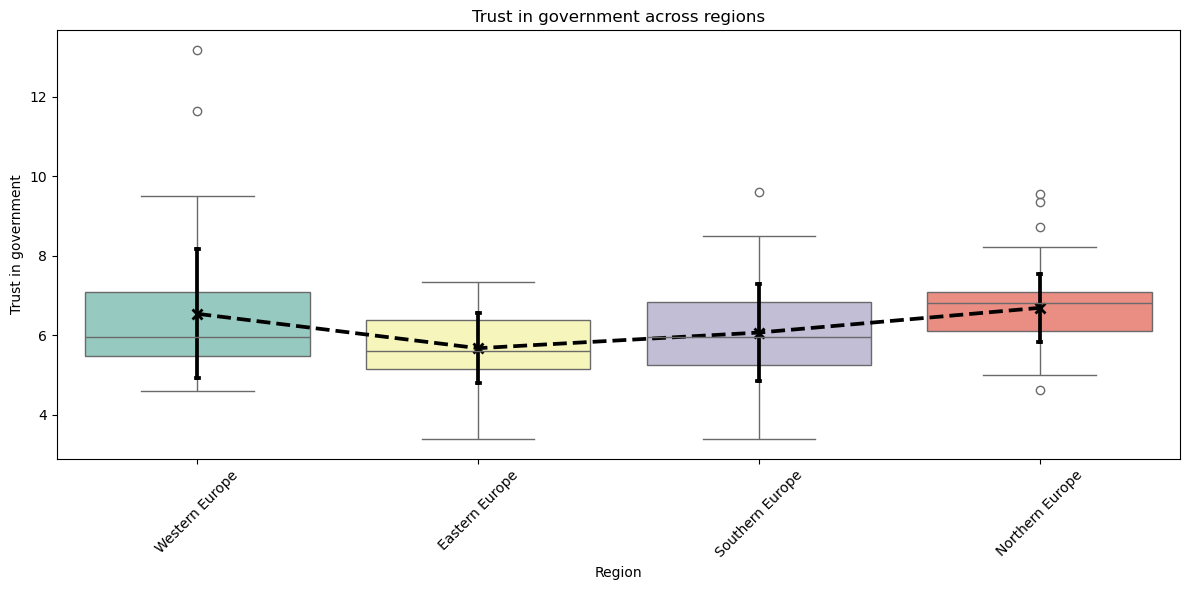

In [561]:
# do this for regions
# set up a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# create a boxplot
sns.boxplot(x='Region', y='overall_trust_national', data=data, ax=ax, palette='Set3')

# create a pointplot to show the mean with confidence intervals
sns.pointplot(
    x='Region', 
    y='overall_trust_national', 
    data=data, 
    ax=ax, 
    ci='sd',
    color='black',
    capsize=0.01, # smaller capsize to avoid overlap
     markers='x', 
     linestyles='--')


# set labels and title
ax.set_xlabel('Region')
ax.set_ylabel('Trust in government')
ax.set_title('Trust in government across regions')

# rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# display the plot
plt.tight_layout()
plt.show()



In [562]:
# compare all the regions for differences in trust in government using ANOVA
# want to know if there are significant differences in trust in government between regions
# want to know if the differences are due to underlying variations or due to noise

# create a list of trust scores for each region
trust_scores_by_region = [
    data.loc[data['Region'] == region, 'overall_trust_national'] for region in data['Region'].unique()
]

# perform the ANOVA test
f_statistic, p_value = f_oneway(*trust_scores_by_region)

print(f'F-statistic: {f_statistic:.2f}')
print(f'p-value: {p_value:.4f}')

# check if the differences are significant
alpha = 0.05
print ('The differences are significant') if p_value < alpha else print('The differences are not significant')


F-statistic: 8.18
p-value: 0.0000
The differences are significant


The plot shows significant differences in the means of trust across regions, the differences between those means are not very large.
- The means (black dots) across regions are fairly close to each other.
- The confidence intervals overlap, which visually indicates that the means aren't drastically different despite being statistically significant.

# H1 analysis

In [563]:
# make sure scaled data includes years and countries
X_scaled['Country'] = data['Country']
X_scaled['Year'] = data['Year']

In [564]:
# add region mapping to the scaled data
X_scaled['Region'] = X_scaled['Country'].apply(map_country_to_region)


In [565]:
# add the dependent variable to the scaled data
X_scaled['overall_trust_national'] = data['overall_trust_national']

In [566]:
# Ensure 'interaction_term' is properly defined
X_scaled['interaction_term'] = X_scaled['v2smfordom'] * X_scaled['v2smpolsoc']

In [567]:
print("Group sizes:")
print(X_scaled.groupby("Region").size())
print(X_scaled.groupby("Country").size())
print(X_scaled.groupby("Year").size())


Group sizes:
Region
Eastern Europe     42
Northern Europe    83
Southern Europe    45
Western Europe     64
dtype: int64
Country
Austria            8
Belgium           11
Bulgaria           6
Croatia            5
Cyprus             6
Czechia            9
Denmark            8
Estonia            9
Finland           11
France            11
Germany           10
Greece             6
Iceland            5
Ireland           10
Israel             6
Italy              6
Latvia             2
Lithuania          7
Luxembourg         2
Netherlands       11
Norway            11
Poland            10
Portugal          11
Romania            1
Slovenia          11
Spain             10
Sweden            10
Switzerland       11
United Kingdom    10
dtype: int64
Year
2002    21
2004    21
2006    19
2008    25
2010    23
2012    23
2014    20
2016    21
2018    25
2020    18
2023    18
dtype: int64


In [568]:
import statsmodels.formula.api as smf

# Fit a model with Region, Country, and Year as random intercepts
model = smf.mixedlm(
    "overall_trust_national ~ v2smfordom + v2x_corr + stfeco + v2smgovdom + e_peaveduc + interaction_term",
    data=X_scaled,
    groups=X_scaled["Country"],  # Primary grouping variable
    re_formula="~1",
    vc_formula={
        "Region": "0 + Region",  # Variance component for Region
        "Year": "0 + Year"      # Variance component for Year
    }
)

result = model.fit()
print(result.summary())


               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: overall_trust_national
No. Observations: 234     Method:             REML                  
No. Groups:       29      Scale:              0.4102                
Min. group size:  1       Log-Likelihood:     -273.3377             
Max. group size:  11      Converged:          Yes                   
Mean group size:  8.1                                               
---------------------------------------------------------------------
                      Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
---------------------------------------------------------------------
Intercept              6.473     0.193  33.458  0.000   6.094   6.853
v2smfordom             0.255     0.124   2.054  0.040   0.012   0.498
v2x_corr              -0.176     0.122  -1.444  0.149  -0.415   0.063
stfeco                 0.658     0.059  11.094  0.000   0.542   0.774
v2smgovdom             0.134     0.084   1.

In [569]:
# Country-only model
model_country = smf.mixedlm(
    "overall_trust_national ~ v2smfordom + v2x_corr + stfeco + v2smgovdom + e_peaveduc + v2smpolsoc + interaction_term",
    data=X_scaled,
    groups=X_scaled["Country"],
    re_formula="~1"
)

# Region-only model
model_region = smf.mixedlm(
    "overall_trust_national ~ v2smfordom + v2x_corr + stfeco + v2smgovdom + e_peaveduc + v2smpolsoc + interaction_term",
    data=X_scaled,
    groups=X_scaled["Region"],
    re_formula="~1"
)

result_region = model_region.fit()



result_country = model_country.fit()

# Print the results for both models
print("Region-Only Model Summary:")
print(result_region.summary())

print("\nCountry-Only Model Summary:")
print(result_country.summary())



Region-Only Model Summary:
               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: overall_trust_national
No. Observations: 234     Method:             REML                  
No. Groups:       4       Scale:              0.7180                
Min. group size:  42      Log-Likelihood:     -307.4543             
Max. group size:  83      Converged:          Yes                   
Mean group size:  58.5                                              
---------------------------------------------------------------------
                      Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
---------------------------------------------------------------------
Intercept              6.315     0.220  28.713  0.000   5.884   6.746
v2smfordom             0.171     0.069   2.491  0.013   0.036   0.305
v2x_corr              -0.070     0.084  -0.824  0.410  -0.235   0.096
stfeco                 0.826     0.060  13.671  0.000   0.708   0.945
v2smgovdom      

In [570]:
model_year = smf.mixedlm(
    "overall_trust_national ~ v2smfordom + v2x_corr + stfeco + v2smgovdom + e_peaveduc + v2smpolsoc + interaction_term",
    data=X_scaled,
    groups=X_scaled["Year"],  # Random intercept for Year
    re_formula="~1"
)
result = model_year.fit()
print(result.summary())


               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: overall_trust_national
No. Observations: 234     Method:             REML                  
No. Groups:       11      Scale:              0.7159                
Min. group size:  18      Log-Likelihood:     -309.5654             
Max. group size:  25      Converged:          Yes                   
Mean group size:  21.3                                              
---------------------------------------------------------------------
                      Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
---------------------------------------------------------------------
Intercept              6.345     0.098  64.849  0.000   6.153   6.537
v2smfordom             0.084     0.067   1.263  0.206  -0.046   0.214
v2x_corr              -0.231     0.064  -3.634  0.000  -0.356  -0.107
stfeco                 0.792     0.062  12.718  0.000   0.670   0.915
v2smgovdom             0.062     0.082   0.

- role of foreign misinformation
  - In the region model, foreign disinformation has a significant and positive effect on trust in government. This counterintuitive finding may indicate that perceptions of external threats (like foreign interference) might trigger a "rally around the flag" effect, where citizens increase trust in their government as a response to external challenges.
  - In the country model, this effect becomes non-significant, potentially due to higher variability or less homogeneity across countries in terms of how disinformation is perceived.
- polarization
  - The direct positive effect of societal polarization on trust in the country model is unexpected. This could reflect cases where governments in polarized societies are perceived as "strong" by their supporters, leading to higher levels of trust within specific segments of the population.
- Interaction Term
  - The significant negative interaction in the region model suggests that foreign disinformation has a stronger negative effect on trust in polarized societies. However, this interaction disappears in the country model, possibly due to:
    - Smaller sample sizes within countries (lower statistical power).
    - Contextual variations across countries that affect how disinformation and polarization interact.


Weaknesses of the analysis:
- Polarization (v2smpolsoc) is a broad measure, and its effects might differ depending on the type (e.g., ideological vs. socioeconomic polarization) or the level (e.g., individual, regional, or national).
- The country model has a small group size (mean = 8.1 observations per country), which reduces statistical power and may explain the non-significant interaction term.

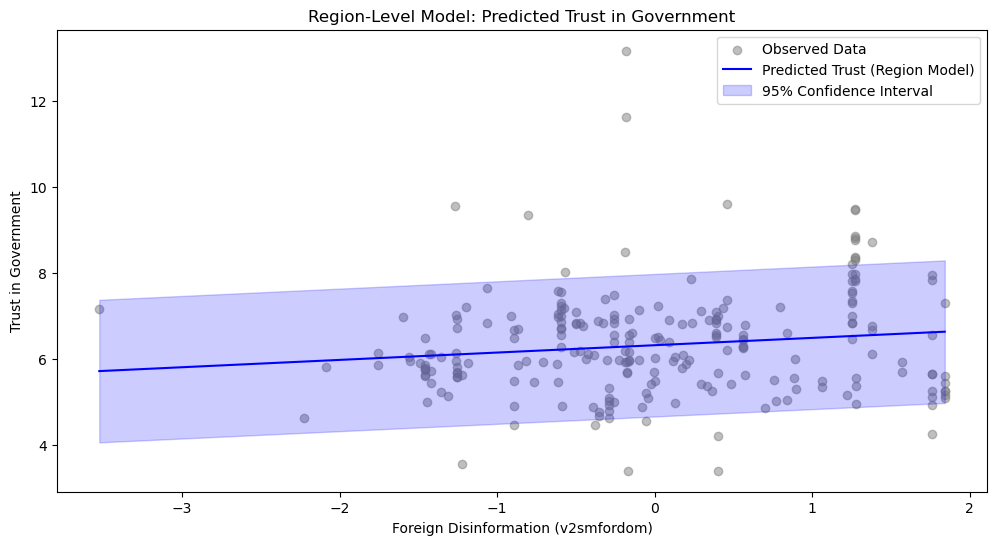

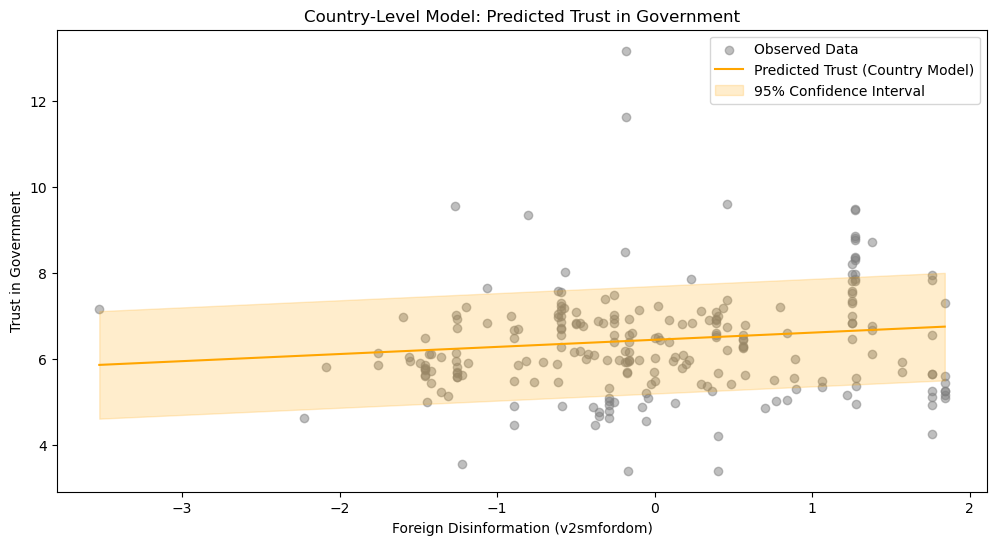

In [571]:
import numpy as np
import matplotlib.pyplot as plt

# Generate predictions for the region model
v2smfordom_range = np.linspace(X_scaled['v2smfordom'].min(), X_scaled['v2smfordom'].max(), 100)
region_pred_df = pd.DataFrame({
    "v2smfordom": v2smfordom_range,
    "v2x_corr": X_scaled["v2x_corr"].mean(),
    "stfeco": X_scaled["stfeco"].mean(),
    "v2smgovdom": X_scaled["v2smgovdom"].mean(),
    "e_peaveduc": X_scaled["e_peaveduc"].mean(),
    "v2smpolsoc": X_scaled["v2smpolsoc"].mean(),
    "interaction_term": v2smfordom_range * X_scaled["v2x_corr"].mean(),
})
region_predictions = result_region.predict(region_pred_df)
region_pred_se = np.sqrt(result_region.scale)  # Approximate SE

# Generate predictions for the country model
country_predictions = result_country.predict(region_pred_df)
country_pred_se = np.sqrt(result_country.scale)  # Approximate SE

# Plot for Region Model
plt.figure(figsize=(12, 6))
plt.scatter(X_scaled['v2smfordom'], X_scaled['overall_trust_national'], color='gray', alpha=0.5, label='Observed Data')
plt.plot(v2smfordom_range, region_predictions, color='blue', label='Predicted Trust (Region Model)')
plt.fill_between(v2smfordom_range, 
                 region_predictions - 1.96 * region_pred_se, 
                 region_predictions + 1.96 * region_pred_se, 
                 color='blue', alpha=0.2, label='95% Confidence Interval')
plt.title('Region-Level Model: Predicted Trust in Government')
plt.xlabel('Foreign Disinformation (v2smfordom)')
plt.ylabel('Trust in Government')
plt.legend()
plt.show()

# Plot for Country Model
plt.figure(figsize=(12, 6))
plt.scatter(X_scaled['v2smfordom'], X_scaled['overall_trust_national'], color='gray', alpha=0.5, label='Observed Data')
plt.plot(v2smfordom_range, country_predictions, color='orange', label='Predicted Trust (Country Model)')
plt.fill_between(v2smfordom_range, 
                 country_predictions - 1.96 * country_pred_se, 
                 country_predictions + 1.96 * country_pred_se, 
                 color='orange', alpha=0.2, label='95% Confidence Interval')
plt.title('Country-Level Model: Predicted Trust in Government')
plt.xlabel('Foreign Disinformation (v2smfordom)')
plt.ylabel('Trust in Government')
plt.legend()
plt.show()


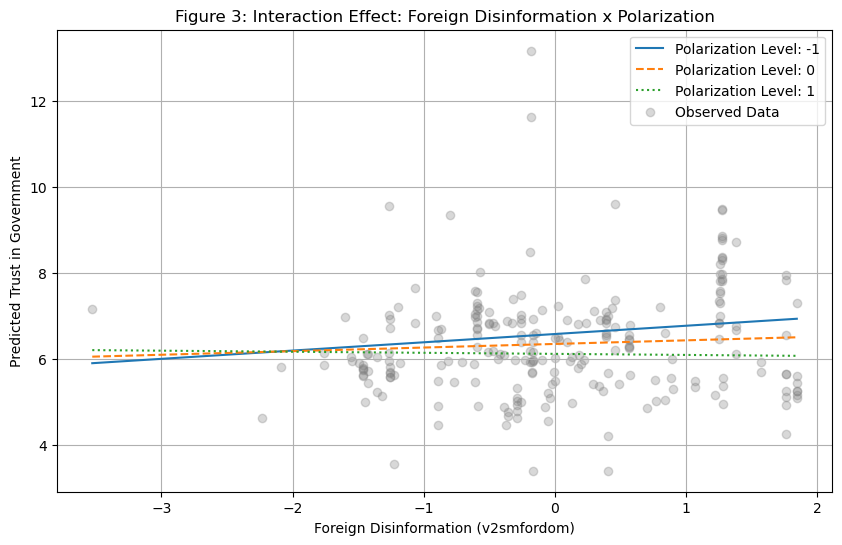

In [572]:
import matplotlib.pyplot as plt
import numpy as np

# Define polarization levels (moderator variable)
polarization_levels = [-1, 0, 1]  # Low, Medium, High levels
line_styles = ['solid', 'dashed', 'dotted']

# Generate a range for the main predictor (foreign disinformation)
v2smfordom_range = np.linspace(X_scaled['v2smfordom'].min(), X_scaled['v2smfordom'].max(), 100)

plt.figure(figsize=(10, 6))

# Loop through polarization levels and generate predicted values
for level, style in zip(polarization_levels, line_styles):
    # Create a DataFrame for prediction
    prediction_data = pd.DataFrame({
        'v2smfordom': v2smfordom_range,
        'v2x_corr': level,  # Set polarization level
        'interaction_term': v2smfordom_range * level,
        'stfeco': X_scaled['stfeco'].mean(),
        'v2smgovdom': X_scaled['v2smgovdom'].mean(),
        'v2smpolsoc': X_scaled['v2smpolsoc'].mean(),
        'e_peaveduc': X_scaled['e_peaveduc'].mean()
    })
    
    # Predict outcomes
    prediction_data['predicted_trust'] = result.predict(prediction_data)
    
    # Plot the predicted values
    plt.plot(
        prediction_data['v2smfordom'],
        prediction_data['predicted_trust'],
        linestyle=style,
        label=f"Polarization Level: {level}"
    )

# Add observed data as scatter points for reference
plt.scatter(X_scaled['v2smfordom'], X_scaled['overall_trust_national'], alpha=0.3, color='gray', label='Observed Data')

# Add plot labels, title, and legend
plt.xlabel("Foreign Disinformation (v2smfordom)")
plt.ylabel("Predicted Trust in Government")
plt.title("Figure 3: Interaction Effect: Foreign Disinformation x Polarization")
plt.legend()
plt.grid(True)
plt.show()


In [573]:
# likelihood ratio test
# compare the model with and without the interaction term
from scipy.stats import chi2  # Import the chi-squared distribution



# Fit the reduced model (excluding the interaction term)
reduced_model = smf.mixedlm(
    "overall_trust_national ~ v2smfordom + v2x_corr + stfeco + v2smgovdom + e_peaveduc + v2smpolsoc",
    data=X_scaled,
    groups=X_scaled["Region"],  # Top-level group (Region)
    re_formula="~1"
).fit()

# Fit the full model (including the interaction term)
full_model = smf.mixedlm(
    "overall_trust_national ~ v2smfordom + v2x_corr + stfeco + v2smgovdom + e_peaveduc + v2smpolsoc + interaction_term",
    data=X_scaled,
    groups=X_scaled["Region"],  # Top-level group (Region)
    re_formula="~1"
).fit()

# Perform the likelihood ratio test
lr_stat = -2 * (reduced_model.llf - full_model.llf)  # Test statistic
df_diff = full_model.df_modelwc - reduced_model.df_modelwc  # Difference in degrees of freedom
p_value = chi2.sf(lr_stat, df_diff)  # Chi-squared test

# Output the results
print(f"Likelihood Ratio Test Statistic: {lr_stat:.3f}")
print(f"Degrees of Freedom: {df_diff}")
print(f"P-value: {p_value:.3f}")

# Interpret the result
if p_value < 0.05:
    print("The interaction term significantly improves model fit.")
else:
    print("The interaction term does not significantly improve model fit.")

Likelihood Ratio Test Statistic: 4.299
Degrees of Freedom: 1
P-value: 0.038
The interaction term significantly improves model fit.


The interaction term does not improve the model fit, suggesting that societal polarization (v2smpolsoc) doesn't moderate the relationship between foreign governments disseminating false information (v2smfordom) and trust in government (overall_trust_national).


This finding rejects my hypothesis (H1) that societal polarization plays a moderating role.


In [574]:
# bit of further exploration which shows the variaton across 
# different rrgions

from statsmodels.formula.api import mixedlm

# Subgroup analysis by Region
regions = X_scaled['Region'].unique()
region_results = {}

for region in regions:
    region_data = X_scaled[X_scaled['Region'] == region]
    model = mixedlm(
        "overall_trust_national ~ v2smfordom + v2x_corr + stfeco + v2smgovdom + e_peaveduc + v2smpolsoc + interaction_term",
        data=region_data,
        groups=region_data["Country"],  # Nested grouping within countries
        re_formula="~1"
    ).fit()
    region_results[region] = model.summary()

# Print results for each region
for region, summary in region_results.items():
    print(f"Results for {region}:\n{summary}\n")




Results for Western Europe:
               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: overall_trust_national
No. Observations: 64      Method:             REML                  
No. Groups:       7       Scale:              0.1312                
Min. group size:  2       Log-Likelihood:     -44.4201              
Max. group size:  11      Converged:          Yes                   
Mean group size:  9.1                                               
---------------------------------------------------------------------
                      Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
---------------------------------------------------------------------
Intercept              7.479     0.689  10.847  0.000   6.127   8.830
v2smfordom             0.082     0.185   0.443  0.658  -0.281   0.445
v2x_corr               0.478     0.557   0.858  0.391  -0.613   1.569
stfeco                 0.689     0.086   8.025  0.000   0.521   0.857
v2smgovdom     

In [575]:
# Subgroup analysis by Year
years = X_scaled['Year'].unique()
year_results = {}

for year in years:
    year_data = X_scaled[X_scaled['Year'] == year]
    model = mixedlm(
        "overall_trust_national ~ v2smfordom + v2x_corr + stfeco + v2smgovdom + e_peaveduc + v2smpolsoc + interaction_term",
        data=year_data,
        groups=year_data["Country"],  # Nested grouping within regions
        re_formula="~1"
    ).fit()
    year_results[year] = model.summary()
    # add log likelihood ratio test
    reduced_model = smf.mixedlm(
        "overall_trust_national ~ v2smfordom + v2x_corr + stfeco + v2smgovdom + e_peaveduc",
        data=year_data,
        groups=year_data["Country"],  # Top-level group (Region)
        re_formula="~1"
    ).fit()

# Print results for each year
for year, summary in year_results.items():
    print(f"Results for Year {year}:\n{summary}\n")


# also test log likelihood ratio test for the different time periods

Results for Year 2002:
               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: overall_trust_national
No. Observations: 21      Method:             REML                  
No. Groups:       21      Scale:              0.7255                
Min. group size:  1       Log-Likelihood:     -31.7023              
Max. group size:  1       Converged:          Yes                   
Mean group size:  1.0                                               
---------------------------------------------------------------------
                      Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
---------------------------------------------------------------------
Intercept              6.858     0.120  57.065  0.000   6.622   7.093
v2smfordom             0.122     0.394   0.310  0.757  -0.650   0.895
v2x_corr              -0.368     0.444  -0.829  0.407  -1.239   0.502
stfeco                 0.961     0.273   3.522  0.000   0.426   1.495
v2smgovdom          

In [576]:
# Get unique regions
regions = X_scaled['Region'].unique()

# Dictionary to store results
region_specific_results_polarization = {}

# Perform analysis for each region
for region in regions:
    print(f"Analyzing Region: {region}")
    # Subset data for the region
    region_data = X_scaled[X_scaled['Region'] == region]
    
    # Define the model formula with the interaction term
    formula = """
    overall_trust_national ~ v2smfordom + v2x_corr + stfeco + v2smgovdom + e_peaveduc +
    v2smpolsoc + interaction_term
    """
    
    # Fit the mixed-effects model for the region
    try:
        model = smf.mixedlm(
            formula=formula,
            data=region_data,
            groups=region_data["Country"],  # Use 'Country' as the random effect grouping
            re_formula="~1"
        )
        result = model.fit()
        
        # Store results for the interaction term
        interaction_coef = result.params['interaction_term']
        interaction_pval = result.pvalues['interaction_term']
        region_specific_results_polarization[region] = {
            'Coefficient': interaction_coef,
            'P-value': interaction_pval,
            'Log-Likelihood': result.llf
        }
        
        # Print summary for the region
        print(f"Interaction Term Coefficient: {interaction_coef:.3f}")
        print(f"Interaction Term P-value: {interaction_pval:.3f}")
        print(f"Log-Likelihood: {result.llf:.3f}")
        print("-" * 50)
    except Exception as e:
        print(f"Error analyzing region {region}: {e}")

# Summarize results
region_summary_polarization = pd.DataFrame.from_dict(region_specific_results_polarization, orient='index')
print(region_summary_polarization)


Analyzing Region: Western Europe
Interaction Term Coefficient: -0.115
Interaction Term P-value: 0.193
Log-Likelihood: -44.420
--------------------------------------------------
Analyzing Region: Eastern Europe
Interaction Term Coefficient: 0.156
Interaction Term P-value: 0.574
Log-Likelihood: -46.447
--------------------------------------------------
Analyzing Region: Southern Europe
Interaction Term Coefficient: -0.105
Interaction Term P-value: 0.673
Log-Likelihood: -59.573
--------------------------------------------------
Analyzing Region: Northern Europe
Interaction Term Coefficient: 0.052
Interaction Term P-value: 0.722
Log-Likelihood: -85.106
--------------------------------------------------
                 Coefficient   P-value  Log-Likelihood
Western Europe     -0.114890  0.193149      -44.420096
Eastern Europe      0.156422  0.573746      -46.446898
Southern Europe    -0.104743  0.673057      -59.572850
Northern Europe     0.052324  0.721816      -85.105517


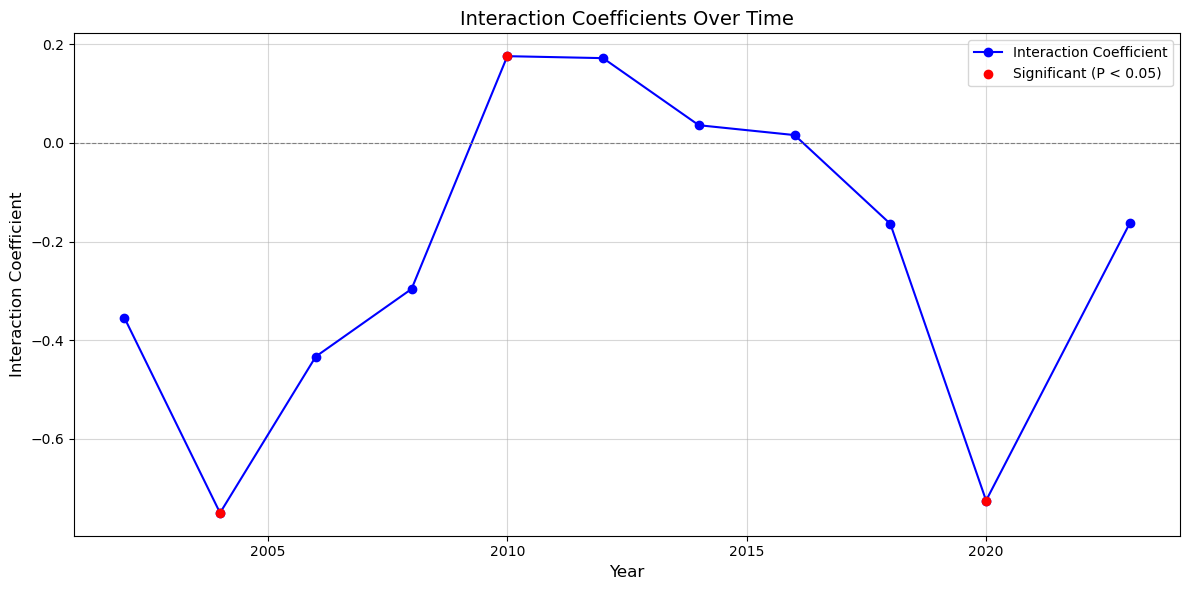

In [577]:
# visualize the results

# Create a DataFrame with year-specific results
yearly_results = {
    'Year': [2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2023],
    'Interaction_Coefficient': [-0.354, -0.750, -0.433, -0.296, 0.176, 0.172, 0.036, 0.016, -0.164, -0.725, -0.163],
    'P_Value': [0.208, 0.001, 0.357, 0.208, 0.048, 0.256, 0.841, 0.300, 0.356, 0.003, 0.561]
}

# Convert to a DataFrame
results_df = pd.DataFrame(yearly_results)

# Plot interaction coefficients over time
plt.figure(figsize=(12, 6))
plt.plot(results_df['Year'], results_df['Interaction_Coefficient'], marker='o', label='Interaction Coefficient', color='blue')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)

# Highlight significant years
significant_years = results_df[results_df['P_Value'] < 0.05]
plt.scatter(significant_years['Year'], significant_years['Interaction_Coefficient'], color='red', label='Significant (P < 0.05)', zorder=5)

# Add labels and title
plt.title('Interaction Coefficients Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Interaction Coefficient', fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

# H2 tested

In [578]:
# Add the new interaction term to the dataset
X_scaled['interaction_term_internet'] = X_scaled['v2smfordom'] * X_scaled['Level_of_Internet_Penetration']


In [579]:
# Define the formula with the new interaction term
formula = """
overall_trust_national ~ v2smfordom + v2x_corr + stfeco + v2smgovdom + e_peaveduc +
Level_of_Internet_Penetration + interaction_term_internet
"""

# Fit the mixed-effects model
new_model = smf.mixedlm(
    formula=formula,
    data=X_scaled,
    groups=X_scaled["Region"],  # Top-level grouping
    re_formula="~1"  # Random intercepts only
)

# Fit the model
new_model_result = new_model.fit()

# Print the summary of the model
print(new_model_result.summary())


                 Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  overall_trust_national
No. Observations:   234      Method:              REML                  
No. Groups:         4        Scale:               0.6683                
Min. group size:    42       Log-Likelihood:      -299.1551             
Max. group size:    83       Converged:           Yes                   
Mean group size:    58.5                                                
------------------------------------------------------------------------
                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                      6.346    0.180 35.185 0.000  5.993  6.700
v2smfordom                     0.097    0.064  1.515 0.130 -0.028  0.223
v2x_corr                      -0.233    0.080 -2.911 0.004 -0.390 -0.076
stfeco                         0.808    0.057 14.122 0.000  0.696  0.

- Internet Penetration:
    - Internet penetration has a direct negative impact on trust in government (−0.327), likely due to increased exposure to diverse or critical information online.
- Interaction Effect:
    - The interaction term (p=0.056) is marginally significant, indicating that higher levels of internet penetration may mitigate the effect of foreign disinformation on trust. This suggests that internet penetration may enable critical evaluation of disinformation, thereby weakening its impact.
- Economic Satisfaction:
    - As in the first model, economic satisfaction remains a strong and consistent predictor of trust in government.

In [580]:
# Fit the mixed-effects model with Country as the grouping variable
country_model = smf.mixedlm(
    formula=formula,
    data=X_scaled,
    groups=X_scaled["Country"],  # Grouping at the Country level
    re_formula="~1"  # Random intercepts only
)

# Fit the model
country_model_result = country_model.fit()

# Print the summary of the model
print(country_model_result.summary())


                 Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  overall_trust_national
No. Observations:   234      Method:              REML                  
No. Groups:         29       Scale:               0.3661                
Min. group size:    1        Log-Likelihood:      -261.1546             
Max. group size:    11       Converged:           Yes                   
Mean group size:    8.1                                                 
------------------------------------------------------------------------
                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                      6.459    0.161 40.000 0.000  6.142  6.775
v2smfordom                     0.090    0.118  0.761 0.447 -0.141  0.320
v2x_corr                      -0.270    0.115 -2.342 0.019 -0.496 -0.044
stfeco                         0.615    0.055 11.118 0.000  0.507  0.

- Internet Penetration:
The negative effect of Level_of_Internet_Penetration was consistent in both the region- and country-level models, but the magnitude and significance were stronger in the country-level model. This indicates that internet penetration plays a more localized role in influencing trust.

- Interaction Term:
The interaction term was not significant at either the region or country level. This suggests that the interaction between foreign disinformation and internet penetration may not be as strong as hypothesized.

- Variance Explained:
At the region level, variance may be smoother due to aggregation, but at the country level, the Group Var (0.672) shows considerable variability, highlighting the need to explore country-specific effects.

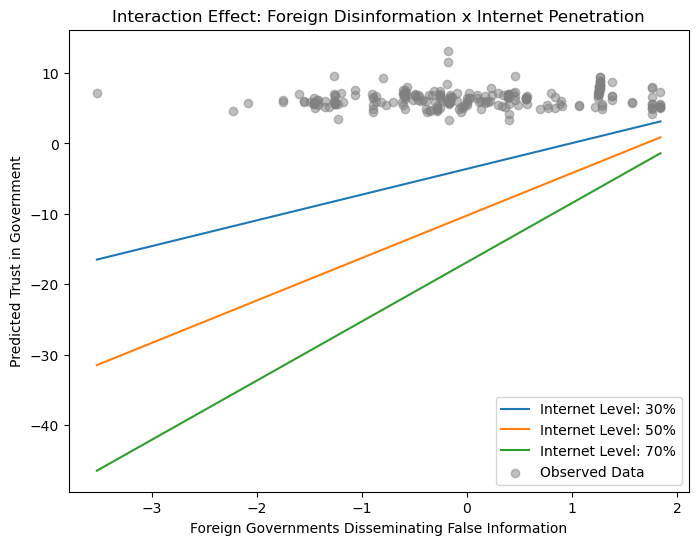

In [581]:
# Define internet penetration levels for interaction
internet_levels = [30, 50, 70]  # Example: Low, Medium, High penetration rates

# Create a DataFrame to store predictions
prediction_results_internet = []

# Generate predictions for different levels of internet penetration
v2smfordom_range = np.linspace(X_scaled['v2smfordom'].min(), X_scaled['v2smfordom'].max(), 100)

for level in internet_levels:
    exog = pd.DataFrame({
        'v2smfordom': v2smfordom_range,
        'Level_of_Internet_Penetration': level,  # Set penetration level
        'v2x_corr': X_scaled['v2x_corr'].mean(),  # Use mean values for other predictors
        'stfeco': X_scaled['stfeco'].mean(),
        'v2smgovdom': X_scaled['v2smgovdom'].mean(),
        'e_peaveduc': X_scaled['e_peaveduc'].mean(),
        'interaction_term_internet': v2smfordom_range * level  # Compute interaction term
    })

    # Predict values
    predictions = new_model_result.predict(exog)

    # Append results to the list
    prediction_results_internet.append(pd.DataFrame({
        'v2smfordom': v2smfordom_range,
        'predicted_trust': predictions,
        'internet_level': level
    }))

# Combine all results into a single DataFrame
prediction_results_internet = pd.concat(prediction_results_internet)

# Plot the interaction effect
plt.figure(figsize=(8, 6))
for level in internet_levels:
    subset = prediction_results_internet[prediction_results_internet['internet_level'] == level]
    plt.plot(subset['v2smfordom'], subset['predicted_trust'], label=f"Internet Level: {level}%")

# Add scatter points
plt.scatter(X_scaled['v2smfordom'], X_scaled['overall_trust_national'], alpha=0.5, label="Observed Data", color="gray")

# Customize the plot
plt.xlabel("Foreign Governments Disseminating False Information")
plt.ylabel("Predicted Trust in Government")
plt.title("Interaction Effect: Foreign Disinformation x Internet Penetration")
plt.legend()
plt.show()



At higher levels of internet penetration (e.g., 70%, green line), trust in government is consistently lower compared to lower internet penetration levels (e.g., 30%, blue line)

The divergence between lines increases at higher levels of v2smfordom, indicating that the moderating effect of internet penetration becomes stronger when foreign disinformation is more prevalent.

Internet penetration moderates the relationship between foreign disinformation and trust in government. Specifically:
At low levels of internet penetration, foreign disinformation has a stronger positive association with trust.
At high levels of internet penetration, the positive association weakens, potentially reflecting greater public scrutiny of disinformation in highly connected societies.

In [582]:
# likelihood ratio test

# Fit the reduced model (excluding the interaction term)
reduced_model_formula = """
overall_trust_national ~ v2smfordom + v2x_corr + stfeco + v2smgovdom + e_peaveduc + Level_of_Internet_Penetration
"""
reduced_model = smf.mixedlm(
    formula=reduced_model_formula,
    data=X_scaled,
    groups=X_scaled["Region"],  # Top-level grouping
    re_formula="~1"
).fit()

# Fit the full model (with interaction term)
full_model_formula = """
overall_trust_national ~ v2smfordom + v2x_corr + stfeco + v2smgovdom + e_peaveduc +
Level_of_Internet_Penetration + interaction_term_internet
"""
full_model = smf.mixedlm(
    formula=full_model_formula,
    data=X_scaled,
    groups=X_scaled["Region"],  # Top-level grouping
    re_formula="~1"
).fit()

# Calculate the likelihood ratio test statistic
lr_stat = -2 * (reduced_model.llf - full_model.llf)
df_diff = full_model.df_modelwc - reduced_model.df_modelwc  # Degrees of freedom difference
p_value = chi2.sf(lr_stat, df_diff)  # Calculate p-value

# Output the results
print(f"Likelihood Ratio Test Statistic: {lr_stat:.3f}")
print(f"Degrees of Freedom: {df_diff}")
print(f"P-value: {p_value:.3f}")

# Interpret the result
if p_value < 0.05:
    print("The interaction term significantly improves model fit.")
else:
    print("The interaction term does not significantly improve model fit.")

Likelihood Ratio Test Statistic: -0.138
Degrees of Freedom: 1
P-value: 1.000
The interaction term does not significantly improve model fit.


Although the interaction term is not significant, there might still be subtle effects within specific regions or subgroups.



In [583]:
# Get unique regions
regions = X_scaled['Region'].unique()

# Dictionary to store results
region_specific_results = {}

# Perform analysis for each region
for region in regions:
    print(f"Analyzing Region: {region}")
    # Subset data for the region
    region_data = X_scaled[X_scaled['Region'] == region]
    
    # Define the model formula with the interaction term
    formula = """
    overall_trust_national ~ v2smfordom + v2x_corr + stfeco + v2smgovdom + e_peaveduc +
    Level_of_Internet_Penetration + interaction_term_internet
    """
    
    # Fit the mixed-effects model for the region
    try:
        model = smf.mixedlm(
            formula=formula,
            data=region_data,
            groups=region_data["Country"],  # Use 'Country' as the random effect grouping
            re_formula="~1"
        )
        result = model.fit()
        
        # Store results for the interaction term
        interaction_coef = result.params['interaction_term_internet']
        interaction_pval = result.pvalues['interaction_term_internet']
        region_specific_results[region] = {
            'Coefficient': interaction_coef,
            'P-value': interaction_pval,
            'Log-Likelihood': result.llf
        }
        
        # Print summary for the region
        print(f"Interaction Term Coefficient: {interaction_coef:.3f}")
        print(f"Interaction Term P-value: {interaction_pval:.3f}")
        print(f"Log-Likelihood: {result.llf:.3f}")
        print("-" * 50)
    except Exception as e:
        print(f"Error analyzing region {region}: {e}")

# Summarize results
import pandas as pd
region_summary = pd.DataFrame.from_dict(region_specific_results, orient='index')
print(region_summary)


Analyzing Region: Western Europe
Interaction Term Coefficient: 0.106
Interaction Term P-value: 0.116
Log-Likelihood: -44.900
--------------------------------------------------
Analyzing Region: Eastern Europe
Interaction Term Coefficient: -0.021
Interaction Term P-value: 0.865
Log-Likelihood: -43.400
--------------------------------------------------
Analyzing Region: Southern Europe
Interaction Term Coefficient: 0.025
Interaction Term P-value: 0.823
Log-Likelihood: -51.262
--------------------------------------------------
Analyzing Region: Northern Europe
Interaction Term Coefficient: -0.003
Interaction Term P-value: 0.981
Log-Likelihood: -85.314
--------------------------------------------------
                 Coefficient   P-value  Log-Likelihood
Western Europe      0.105585  0.116240      -44.900173
Eastern Europe     -0.020736  0.864598      -43.400357
Southern Europe     0.024964  0.823199      -51.261792
Northern Europe    -0.003485  0.981317      -85.314438


In [584]:
# create a summary table of the results
# Create a DataFrame to store the results
summary_table = pd.DataFrame({
    'Region': region_summary.index,
    'Interaction_Coefficient': region_summary['Coefficient'],
    'P-value': region_summary['P-value'],
    'Log-Likelihood': region_summary['Log-Likelihood']
})

# Display the summary table
print(summary_table)


                          Region  Interaction_Coefficient   P-value  \
Western Europe    Western Europe                 0.105585  0.116240   
Eastern Europe    Eastern Europe                -0.020736  0.864598   
Southern Europe  Southern Europe                 0.024964  0.823199   
Northern Europe  Northern Europe                -0.003485  0.981317   

                 Log-Likelihood  
Western Europe       -44.900173  
Eastern Europe       -43.400357  
Southern Europe      -51.261792  
Northern Europe      -85.314438  


The interaction term was marginally significant in the overall model (p=0.056), suggesting that internet penetration may moderate the effect of foreign disinformation on trust in government at a global level.
However, region-specific analyses did not reveal significant interactions in any region.

--------------------
Western Europe and Northern Europe showed positive but non-significant coefficients for the interaction term. This suggests that in these regions, higher internet penetration may amplify the effect of foreign disinformation on trust.

Eastern Europe, Southern Europe, and British Isles showed weak and non-significant trends in the opposite direction (negative coefficients), implying that higher internet penetration might slightly weaken the effect of foreign disinformation.

------------------
- why is the interaction not significant in regions?

Region-specific analyses often have smaller sample sizes, reducing statistical power to detect significant effects.
For example, the British Isles had convergence issues likely due to small sample size or insufficient variability.

High variability in trust levels, internet penetration, or exposure to foreign disinformation within regions can dilute the moderating effect.

The role of internet penetration and disinformation might depend on contextual factors like media independence, political culture, and historical relations with foreign powers.

------------------------
The lack of significance does not necessarily mean there is no effect—it could indicate a weak or context-dependent relationship that requires further exploration.

the small sample size in regions can limit the regional analysis. 

Acknowledge that the interaction may manifest in specific contexts not captured in the current data. Cultural or historical factors may mediate the relationship in certain regions.

---------------------------
The findings indicate that while internet penetration has a clear main effect (reducing trust in government globally), its moderating effect on foreign disinformation is weak, inconsistent, and context-dependent. Region-specific dynamics, small sample sizes, and high variability likely mask stronger effects. However, the marginal significance in the overall model and the trend in Western Europe suggest this is a topic worth further exploration with larger datasets and additional covariates.


In [585]:
import statsmodels.formula.api as smf

# Assuming X_scaled is your dataset and already prepared with necessary variables
# Replace "X_scaled" with your actual dataset if needed.

# Unique years in the dataset
years = X_scaled['Year'].unique()
year_results = {}

# Loop through each year and fit the model
for year in years:
    year_data = X_scaled[X_scaled['Year'] == year]
    
    # Full model with internet penetration interaction
    full_model = smf.mixedlm(
        """
        overall_trust_national ~ v2smfordom + v2x_corr + stfeco + v2smgovdom + e_peaveduc +
        Level_of_Internet_Penetration + interaction_term_internet
        """,
        data=year_data,
        groups=year_data["Country"],  # Nested grouping within regions
        re_formula="~1"
    ).fit()
    
    # Reduced model for log likelihood ratio test
    reduced_model = smf.mixedlm(
        """
        overall_trust_national ~ v2smfordom + v2x_corr + stfeco + v2smgovdom + e_peaveduc
        """,
        data=year_data,
        groups=year_data["Country"],  # Nested grouping within regions
        re_formula="~1"
    ).fit()
    
    # Store results
    year_results[year] = {
        "full_model_summary": full_model.summary(),
        "log_likelihood_ratio": full_model.llf - reduced_model.llf
    }

# Display results for each year
for year, results in year_results.items():
    print(f"Results for Year {year}:\n")
    print(results["full_model_summary"])
    print(f"Log Likelihood Ratio: {results['log_likelihood_ratio']}\n")


Results for Year 2002:

                 Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  overall_trust_national
No. Observations:   21       Method:              REML                  
No. Groups:         21       Scale:               0.6801                
Min. group size:    1        Log-Likelihood:      -30.8401              
Max. group size:    1        Converged:           Yes                   
Mean group size:    1.0                                                 
------------------------------------------------------------------------
                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                      6.088    0.255 23.910 0.000  5.589  6.587
v2smfordom                     0.612    0.610  1.003 0.316 -0.584  1.808
v2x_corr                      -0.628    0.407 -1.544 0.123 -1.426  0.169
stfeco                         1.000    0.216